C:\Users\janna\AppData\Local\Temp\ipykernel_28104\168912269.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


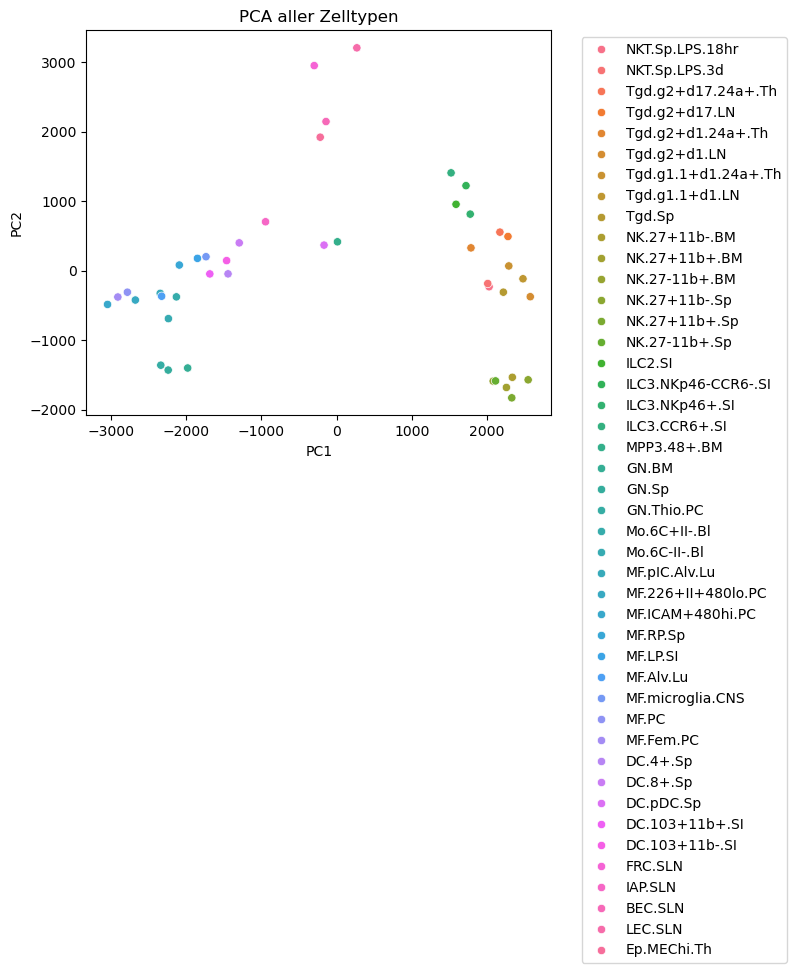

C:\Users\janna\AppData\Local\Temp\ipykernel_28104\168912269.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


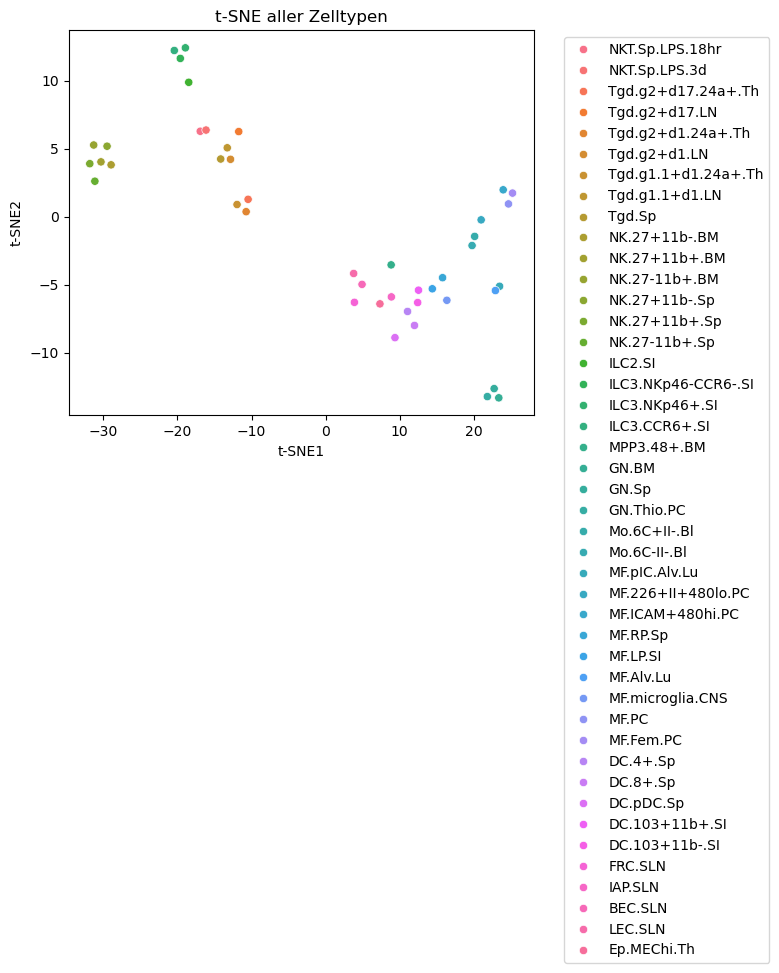

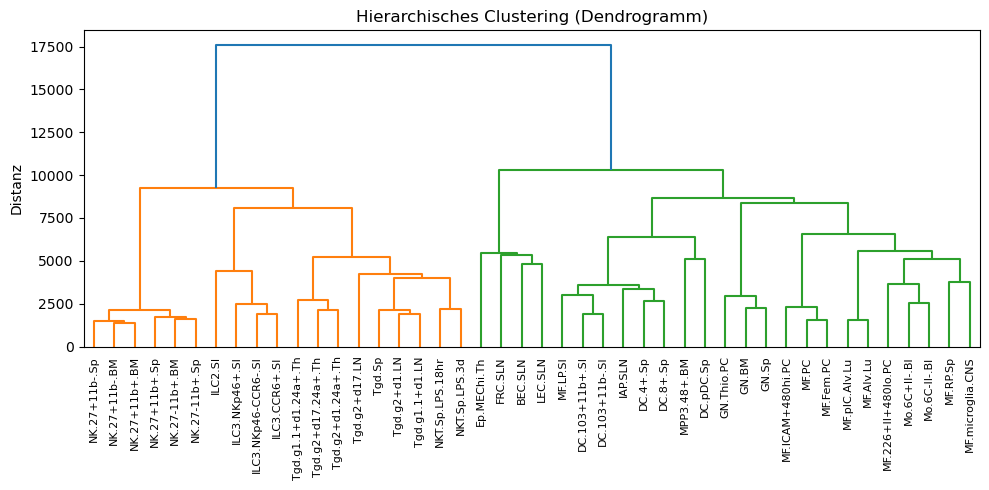

In [ ]:
 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

# CSV einlesen mit korrektem Encoding
df_raw = pd.read_csv("data/ImmGenATAC18_AllOCRsInfo.csv", header=0, quotechar='"', encoding='latin1')

# OCR-IDs holen
ocr_ids = df_raw.iloc[:, 0].values

# Zelltyp-Matrix holen (ab Spalte 54)
df_expr = df_raw.iloc[:, 54:]

# Transponieren
df_expr = df_expr.T
df_expr.columns = ocr_ids
df_expr.index.name = "Celltype"

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_expr)

# t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(df_expr)

# Hierarchisches Clustering
linkage_matrix = linkage(df_expr, method='ward')

# PCA-Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df_expr.index)
plt.title("PCA aller Zelltypen")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# t-SNE-Plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df_expr.index)
plt.title("t-SNE aller Zelltypen")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Dendrogramm
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=df_expr.index, leaf_rotation=90)
plt.title("Hierarchisches Clustering (Dendrogramm)")
plt.ylabel("Distanz")
plt.tight_layout()
plt.show()